In [168]:
import numpy as np
import pandas as pd
from scipy.stats import mstats
import seaborn as sns

from scipy import stats

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm


plt.rcParams['font.family'] = 'Malgun Gothic'  
plt.rcParams['axes.unicode_minus'] = False

In [169]:
# 데이터 전처리 시작
df= pd.read_csv(r'C:\Users\USER\Documents\git\SKN_Team_project2(작업용)\data\train_cleaned_outlier_del.csv')
df.head(5)

,Unnamed: 0,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,1,3000010,Yes,16.99,20.0,17.0,0.00,0.0,0.0,-4.0,...,0,5,No,0,30,No,4,Suburban,Professional,Yes
1,3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,...,0,6,No,0,10,No,4,Other,Other,No
2,4,3000026,Yes,17.14,20.0,17.0,0.00,0.0,0.0,0.0,...,0,9,No,1,10,No,1,Other,Professional,Yes
3,5,3000030,No,38.05,682.0,52.0,0.25,0.0,0.0,148.0,...,0,1,No,1,30,No,3,Other,Other,Yes
4,6,3000038,No,31.66,26.0,30.0,0.25,0.0,0.0,60.0,...,0,9,No,1,30,No,1,Other,Self,Yes


In [170]:
# 데이터 및 컬럼 개수 확인
display(df.shape)
display(df.head())

(50609, 59)

,Unnamed: 0,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,1,3000010,Yes,16.99,20.0,17.0,0.00,0.0,0.0,-4.0,...,0,5,No,0,30,No,4,Suburban,Professional,Yes
1,3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,...,0,6,No,0,10,No,4,Other,Other,No
2,4,3000026,Yes,17.14,20.0,17.0,0.00,0.0,0.0,0.0,...,0,9,No,1,10,No,1,Other,Professional,Yes
3,5,3000030,No,38.05,682.0,52.0,0.25,0.0,0.0,148.0,...,0,1,No,1,30,No,3,Other,Other,Yes
4,6,3000038,No,31.66,26.0,30.0,0.25,0.0,0.0,60.0,...,0,9,No,1,30,No,1,Other,Self,Yes


In [171]:
# 데이터 컬럼 및 타입 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50609 entries, 0 to 50608
Data columns (total 59 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 50609 non-null  int64  
 1   CustomerID                 50609 non-null  int64  
 2   Churn                      50609 non-null  object 
 3   MonthlyRevenue             50609 non-null  float64
 4   MonthlyMinutes             50609 non-null  float64
 5   TotalRecurringCharge       50609 non-null  float64
 6   DirectorAssistedCalls      50609 non-null  float64
 7   OverageMinutes             50609 non-null  float64
 8   RoamingCalls               50609 non-null  float64
 9   PercChangeMinutes          50609 non-null  float64
 10  PercChangeRevenues         50609 non-null  float64
 11  DroppedCalls               50609 non-null  float64
 12  BlockedCalls               50609 non-null  float64
 13  UnansweredCalls            50609 non-null  flo

In [172]:
# 요약 통계량 확인
df.describe()

,Unnamed: 0,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,CreditRating
count,50609.000000,5.060900e+04,50609.000000,50609.000000,50609.000000,50609.000000,50609.000000,50609.000000,50609.000000,50609.000000,...,50609.000000,50609.000000,50609.000000,50609.000000,50609.000000,50609.000000,50609.000000,50609.000000,50609.000000,50609.000000
mean,25496.060286,3.201753e+06,55.771352,495.561857,45.614535,0.710215,31.545496,0.555379,-9.307198,-1.741074,...,1.491316,372.645360,30.797941,20.781462,0.031378,0.015017,0.049833,4.327432,0.052007,2.883282
std,14697.527015,1.166165e+05,30.739704,430.477465,19.817560,1.153269,52.334265,1.293283,164.099980,19.720723,...,0.697660,226.667518,22.282967,23.875382,0.174338,0.121622,0.236571,3.138503,0.351286,1.580123
min,1.000000,3.000010e+06,15.480000,20.000000,10.000000,0.000000,0.000000,0.000000,-375.000000,-46.800000,...,1.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,12780.000000,3.100822e+06,33.580000,158.000000,30.000000,0.000000,0.000000,0.000000,-82.000000,-6.900000,...,1.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,25509.000000,3.201414e+06,48.350000,365.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,...,1.000000,330.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,2.000000
75%,38227.000000,3.304858e+06,70.830000,720.000000,60.000000,0.990000,40.000000,0.300000,65.000000,1.600000,...,2.000000,515.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000,4.000000
max,51043.000000,3.399974e+06,133.680000,1554.000000,85.000000,4.210000,187.000000,5.000000,342.000000,46.000000,...,3.000000,865.000000,99.000000,99.000000,1.000000,1.000000,5.000000,9.000000,12.000000,7.000000


In [173]:
# 각 컬럼에 대한 설명
column_info = {
    'Unnamed: 0': ('인덱스 컬럼', '인덱스'),
    'CustomerID': ('고객별 고유 ID', '식별자'),
    'Churn': ('고객 이탈 여부', '타겟 변수'),
    'MonthlyRevenue': ('고객의 월별 수익', '수익/비용'),
    'MonthlyMinutes': ('월별 사용 시간(분)', '사용량'),
    'TotalRecurringCharge': ('총 반복 청구 금액', '수익/비용'),
    'DirectorAssistedCalls': ('상담원이 도와준 통화 횟수', '통화'),
    'OverageMinutes': ('요금제를 초과한 추가 통화 시간(분)', '사용량'),
    'RoamingCalls': ('로밍 중에 발생한 통화 횟수', '통화'),
    'PercChangeMinutes': ('월별 통화 시간 변화율', '사용량'),
    'PercChangeRevenues': ('월별 수익 변화율', '수익/비용'),
    'DroppedCalls': ('통화 도중 끊긴 횟수', '통화'),
    'BlockedCalls': ('차단된 통화 횟수', '통화'),
    'UnansweredCalls': ('응답 없는 통화 횟수', '통화'),
    'CustomerCareCalls': ('고객 센터에 연결된 통화 횟수', '통화'),
    'ThreewayCalls': ('3자 통화 횟수', '통화'),
    'ReceivedCalls': ('수신된 통화 횟수', '통화'),
    'OutboundCalls': ('발신된 통화 횟수', '통화'),
    'InboundCalls': ('수신된 통화와 발신된 통화의 총 횟수', '통화'),
    'PeakCallsInOut': ('피크 시간대 통화 횟수', '통화'),
    'OffPeakCallsInOut': ('비피크 시간대 통화 횟수', '통화'),
    'DroppedBlockedCalls': ('차단되거나 끊긴 통화 횟수', '통화'),
    'CallForwardingCalls': ('착신 전환된 통화 횟수', '통화'),
    'CallWaitingCalls': ('대기 중인 통화 횟수', '통화'),
    'MonthsInService': ('서비스 이용 개월 수', '사용 기간'),
    'UniqueSubs': ('가구 내 고유 가입자 수', '구성원 정보'),
    'ActiveSubs': ('활성화된 가입자 수', '구성원 정보'),
    'ServiceArea': ('서비스 제공 지역', '지역 정보'),
    'Handsets': ('보유한 핸드셋 수', '장비'),
    'HandsetModels': ('보유한 핸드셋 모델 수', '장비'),
    'CurrentEquipmentDays': ('현재 사용 중인 장비의 사용 일수', '장비'),
    'AgeHH1': ('첫 번째 가구 구성원의 나이', '가구 정보'),
    'AgeHH2': ('두 번째 가구 구성원의 나이', '가구 정보'),
    'ChildrenInHH': ('가구 내 자녀 수', '가구 정보'),
    'HandsetRefurbished': ('리퍼폰 여부', '장비 정보'),
    'HandsetWebCapable': ('웹 사용 가능 여부', '장비 정보'),
    'TruckOwner': ('트럭 소유 여부', '자산 정보'),
    'RVOwner': ('RV 소유 여부', '자산 정보'),
    'Homeownership': ('주택 소유 여부', '자산 정보'),
    'BuysViaMailOrder': ('우편 주문으로 상품 구매 여부', '구매 정보'),
    'RespondsToMailOffers': ('우편으로 발송된 제안에 응답 여부', '구매 정보'),
    'OptOutMailings': ('우편 수신 거부 여부', '우편 정보'),
    'NonUSTravel': ('미국 외 지역으로의 여행 여부', '여행 정보'),
    'OwnsComputer': ('컴퓨터 소유 여부', '자산 정보'),
    'HasCreditCard': ('신용카드 소유 여부', '자산 정보'),
    'RetentionCalls': ('유지 관리 팀에 연결된 통화 횟수', '통화'),
    'RetentionOffersAccepted': ('유지 관리 제안을 수락한 횟수', '통화'),
    'NewCellphoneUser': ('새로운 휴대폰 사용자 여부', '가입 정보'),
    'NotNewCellphoneUser': ('기존 휴대폰 사용자 여부', '가입 정보'),
    'ReferralsMadeBySubscriber': ('구독자가 만든 추천 횟수', '추천 정보'),
    'IncomeGroup': ('소득 그룹', '소득 정보'),
    'OwnsMotorcycle': ('오토바이 소유 여부', '자산 정보'),
    'AdjustmentsToCreditRating': ('신용 등급에 대한 조정 사항', '신용 정보'),
    'HandsetPrice': ('핸드셋 가격', '장비 정보'),
    'MadeCallToRetentionTeam': ('유지 관리 팀에 연결된 통화 여부', '통화 정보'),
    'CreditRating': ('신용 등급', '신용 정보'),
    'PrizmCode': ('프리즘 코드(인구 통계/라이프스타일)', '인구 통계 정보'),
    'Occupation': ('직업', '직업 정보'),
    'MaritalStatus': ('결혼 여부', '결혼 정보')
}

# 컬럼명으로 설명과 카테고리를 추가한 데이터프레임 생성
column_descriptions = []
for column in df.columns:
    if column in column_info:
        column_descriptions.append((column, column_info[column][0], column_info[column][1]))
    else:
        column_descriptions.append((column, '설명 없음', '카테고리 없음'))

# 테이블로 변환
df_info = pd.DataFrame(column_descriptions, columns=['컬럼명', '설명', '카테고리'])

# Pandas DataFrame을 표 형식으로 출력
df_info

,컬럼명,설명,카테고리
0,Unnamed: 0,인덱스 컬럼,인덱스
1,CustomerID,고객별 고유 ID,식별자
2,Churn,고객 이탈 여부,타겟 변수
3,MonthlyRevenue,고객의 월별 수익,수익/비용
4,MonthlyMinutes,월별 사용 시간(분),사용량
5,TotalRecurringCharge,총 반복 청구 금액,수익/비용
6,DirectorAssistedCalls,상담원이 도와준 통화 횟수,통화
7,OverageMinutes,요금제를 초과한 추가 통화 시간(분),사용량
8,RoamingCalls,로밍 중에 발생한 통화 횟수,통화
9,PercChangeMinutes,월별 통화 시간 변화율,사용량


C:\Users\USER\AppData\Local\Temp\ipykernel_2916\3762193058.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette=[no_color, yes_color], ax=axes[0])


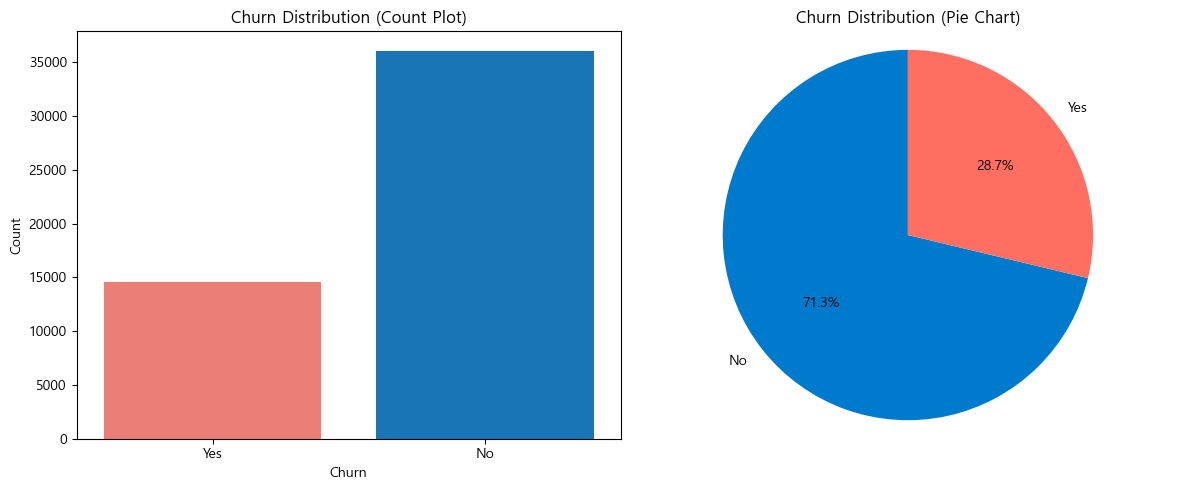

In [174]:
# EDA 및 전처리
## 타겟 변수(churn) 시각화

import matplotlib.pyplot as plt
import seaborn as sns

# Churn 분포 데이터 준비
churn_counts = df['Churn'].value_counts()

# 시각화 설정
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 색상 설정 (Yes와 No에 대한 동일한 색상 지정)
yes_color = '#007acc'  # Yes (Churn)
no_color = '#ff6f61'    # No (Not Churn)

# 1. 막대그래프
sns.countplot(x='Churn', data=df, palette=[no_color, yes_color], ax=axes[0])
axes[0].set_title('Churn Distribution (Count Plot)')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Count')

# 2. 파이차트
axes[1].pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=[yes_color, no_color])
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[1].set_title('Churn Distribution (Pie Chart)')

# 그래프 출력
plt.tight_layout()
plt.show()



In [175]:
# 카테고리 변수 시각화화

# 카테고리 변수 찾기
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# 카테고리 변수 출력
print("Categorical Variables:")
print(categorical_columns)

Categorical Variables:
['Churn', 'ServiceArea', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser', 'NotNewCellphoneUser', 'OwnsMotorcycle', 'HandsetPrice', 'MadeCallToRetentionTeam', 'PrizmCode', 'Occupation', 'MaritalStatus']


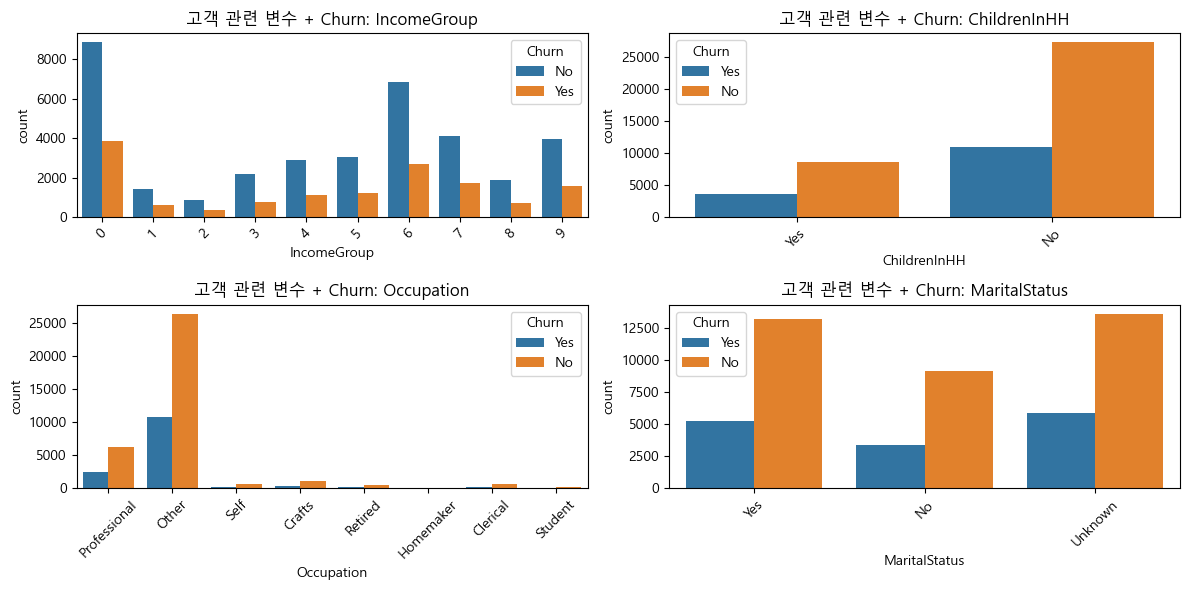

In [176]:
# 요인 1. 고객 관련 변수 
# IncomeGroup: 소득 그룹
# ChildrenInHH: 가정 내 자녀 수
# Occupation: 직업
# MaritalStatus: 혼인 상태

# 고객 관련 그룹 정의
customer_related = ['IncomeGroup', "ChildrenInHH", 'Occupation', 'MaritalStatus']

# 고객 관련 변수 시각화
plt.figure(figsize=(12, 6))
for i, variable in enumerate(customer_related):
    plt.subplot(2, 2, i + 1)
    sns.countplot(data=df, x=variable, hue = 'Churn')
    plt.title(f'고객 관련 변수 + Churn: {variable}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


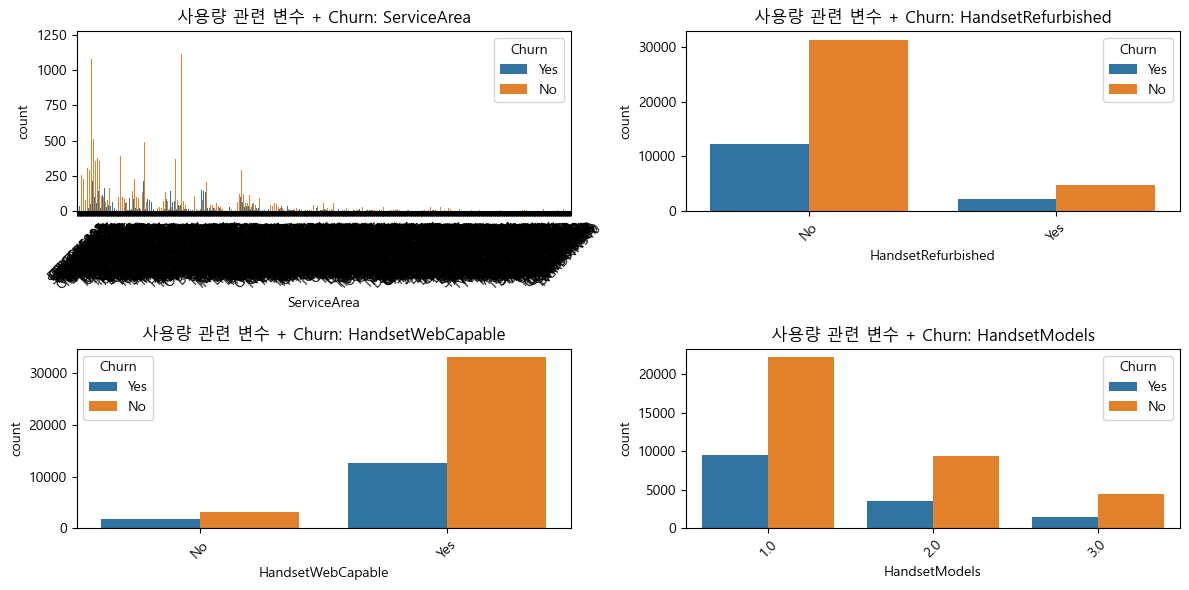

In [177]:
# 요인 2: 서비스 이용 관련 변수
# ServiceArea: 서비스 지역
# HandsetRefurbished: 리퍼폰 사용 여부
# HandsetWebCapable: 웹 기능 탑재 여부
# HandsetModels: 핸드셋 모델

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 서비스 이용 관련 그룹 정의
customer_related = ['ServiceArea', 'HandsetRefurbished', 'HandsetWebCapable', 'HandsetModels']

# 고객 관련 변수 시각화
plt.figure(figsize=(12, 6))
for i, variable in enumerate(customer_related):
    plt.subplot(2, 2, i + 1)
    sns.countplot(data=df, x=variable,hue = 'Churn')
    plt.title(f'사용량 관련 변수 + Churn: {variable}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



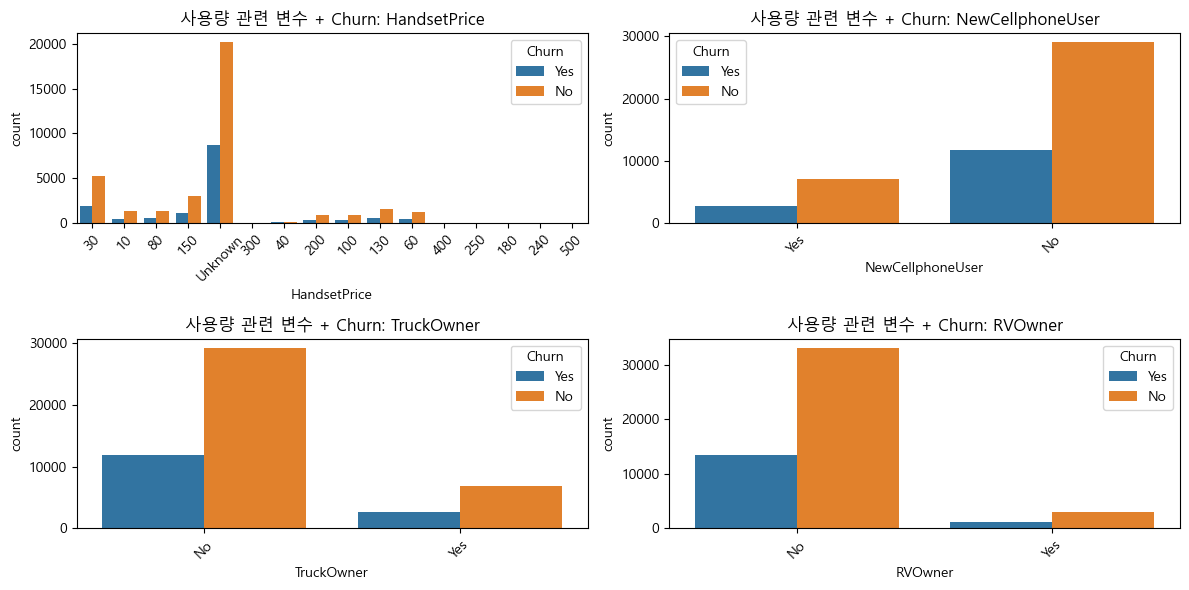

In [178]:
# 요인 3. 사용량 관련 변수
# HandsetPrice: 핸드셋 가격
# NewCellphoneUser: 신규 휴대폰 사용자 여부
# TruckOwner: 트럭 소유 여부
# RVOwner: RV 소유 여부

# 사용량 관련 그룹 정의
usage_related = ['HandsetPrice', 'NewCellphoneUser', 'TruckOwner', 'RVOwner']

# 사용량 관련 변수 시각화
plt.figure(figsize=(12, 6))
for i, variable in enumerate(usage_related):
    plt.subplot(2, 2, i + 1)
    sns.countplot(data=df, x=variable, hue = 'Churn')
    plt.title(f'사용량 관련 변수 + Churn: {variable}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


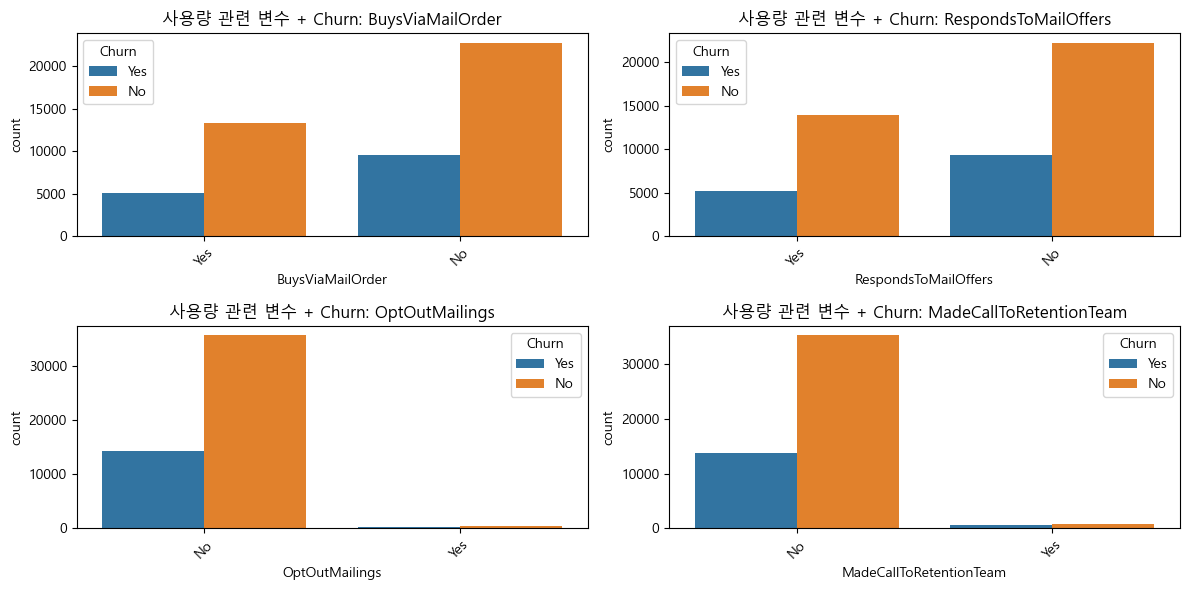

In [179]:
# 요인 4. 마케팅 및 반응 관련 변수
# BuysViaMailOrder: 우편 주문 구매 여부
# RespondsToMailOffers: 우편 제안에 대한 반응
# OptOutMailings: 우편 발송 제외 여부
# MadeCallToRetentionTeam: 유지팀에 전화한 적 여부

# 사용량 관련 그룹 정의
usage_related = ['BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 'MadeCallToRetentionTeam']

# 사용량 관련 변수 시각화
plt.figure(figsize=(12, 6))
for i, variable in enumerate(usage_related):
    plt.subplot(2, 2, i + 1)
    sns.countplot(data=df, x=variable, hue = 'Churn')
    plt.title(f'사용량 관련 변수 + Churn: {variable}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

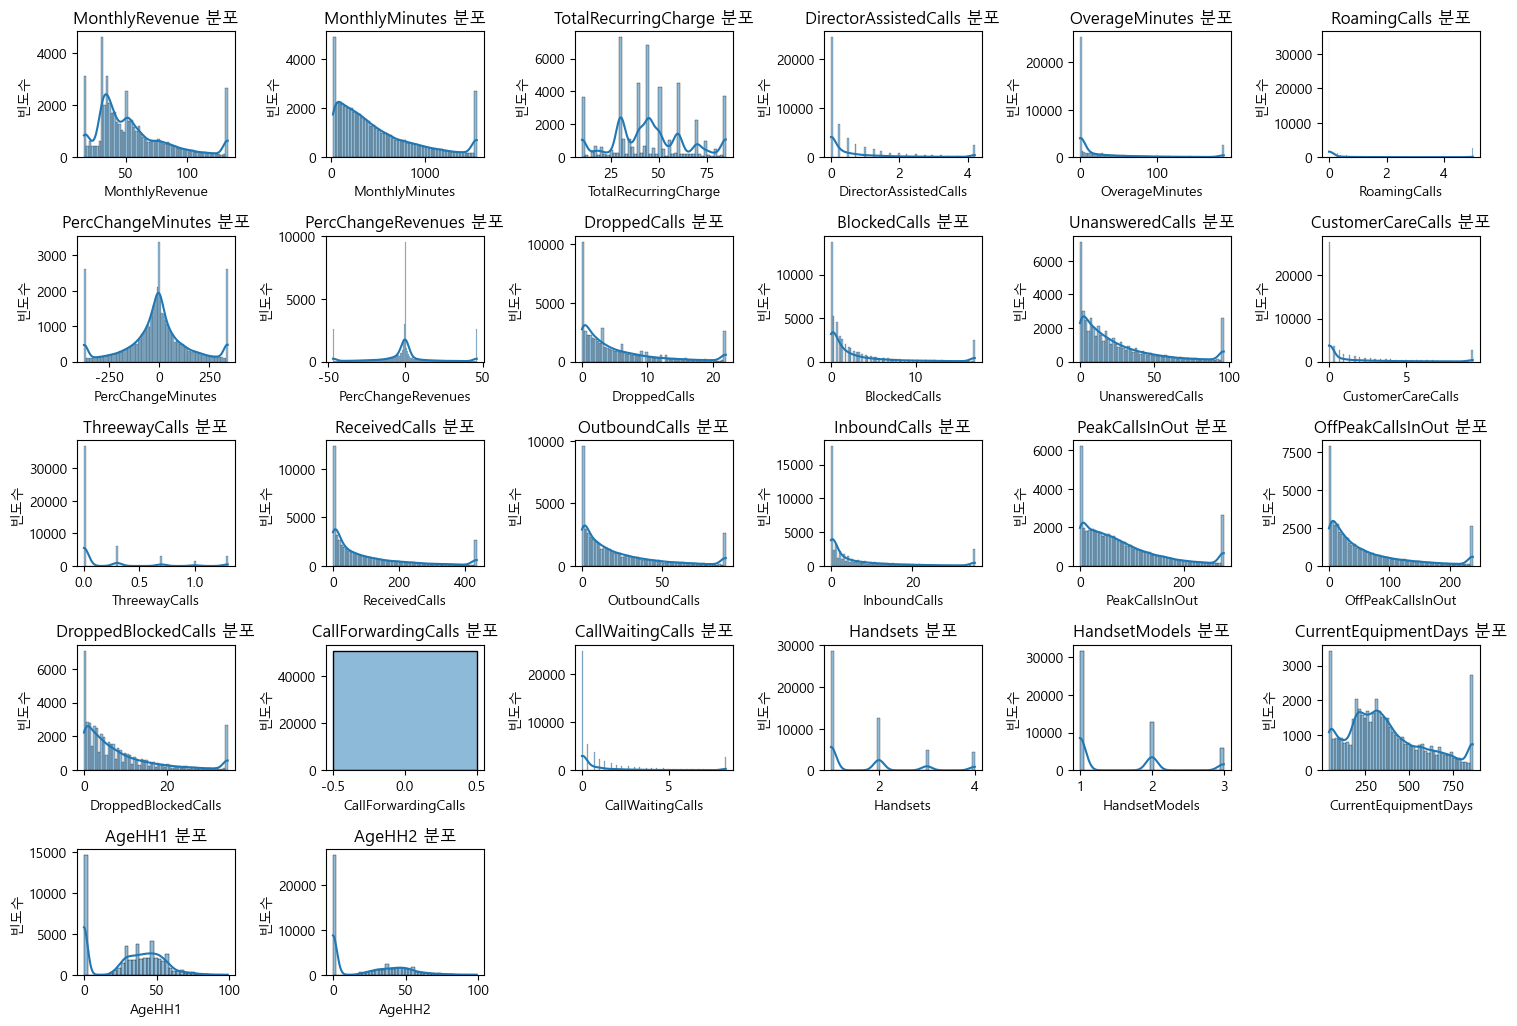

In [180]:
# 숫자형 변수 시각화화 - 분포도

# 숫자형 변수 선택
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# 이진 변수(0과 1로 분류하는 컬럼) 목록
binary_columns = df.select_dtypes(include=['int', 'bool']).columns.tolist()

# 이진 변수를 제외한 숫자형 변수 필터링
filtered_numeric_columns = [col for col in numeric_columns if col not in binary_columns]

# 고객 식별 정보 제외
filtered_numeric_columns = [col for col in filtered_numeric_columns if col not in ["Unnamed: 0", "CustomerID"]]


# 숫자형 변수 시각화
plt.figure(figsize=(15, 12))
for i, column in enumerate(filtered_numeric_columns):
    plt.subplot(6, 6, i + 1) 
    sns.histplot(df[column], kde=True)  # 히스토그램 + 밀도 곡선
    plt.title(f'{column} 분포')
    plt.xlabel(column)
    plt.ylabel('빈도수')

plt.tight_layout()
plt.show()



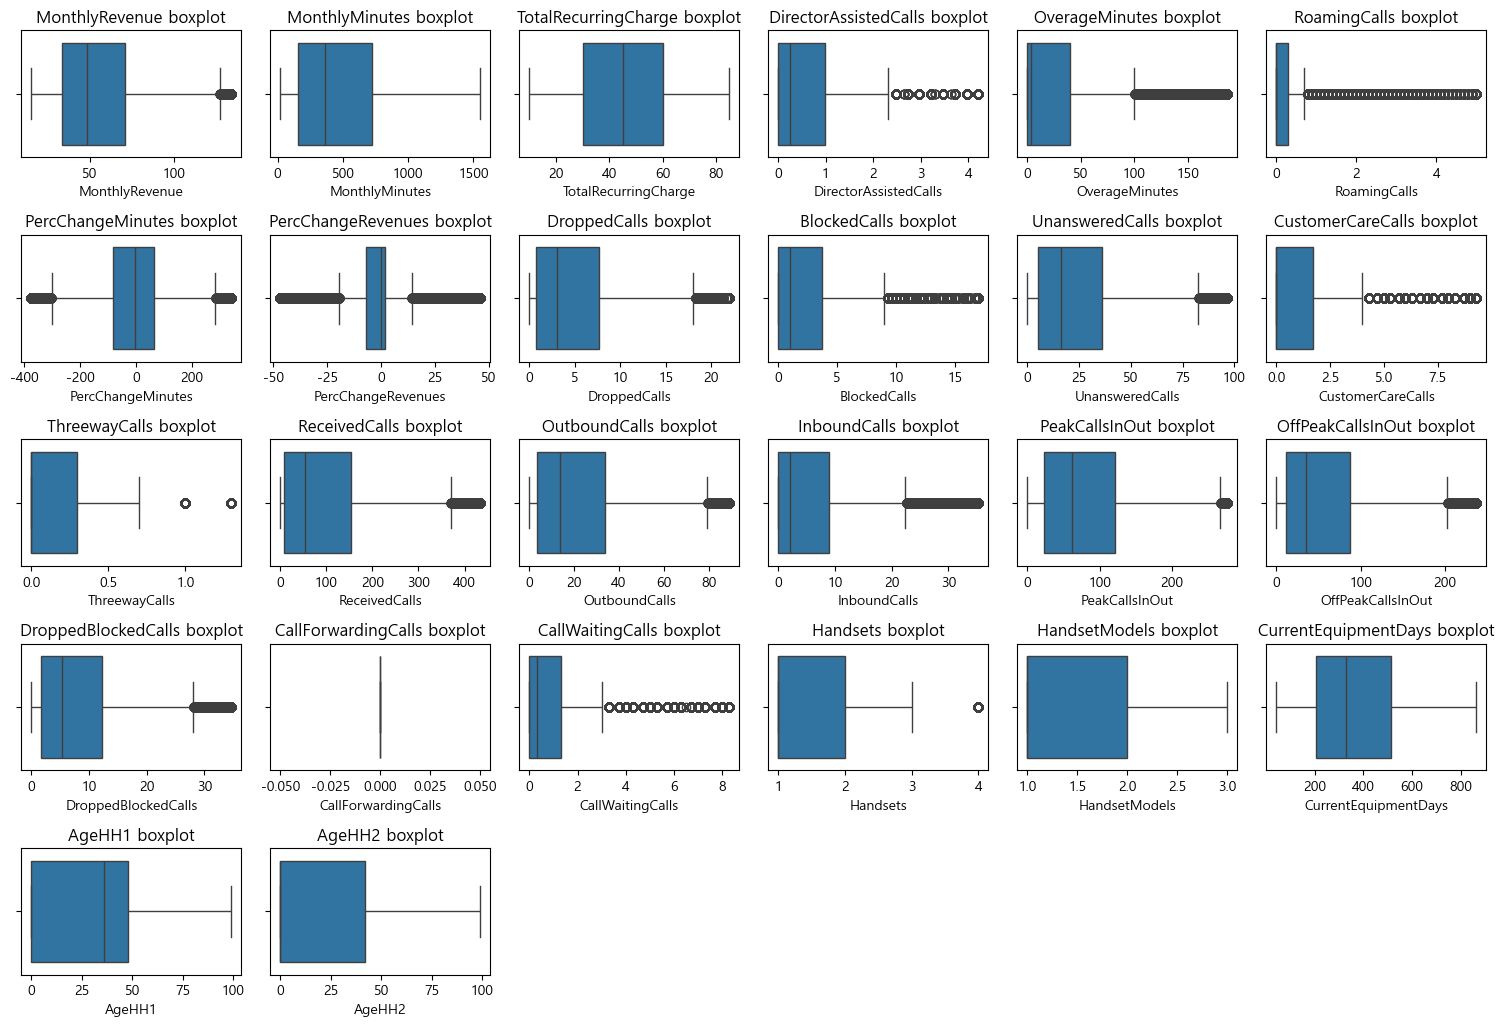

In [181]:
# 숫자형 변수 시각화 - 박스풀롯

# 박스 플롯 시각화
plt.figure(figsize=(15, 12))
for i, column in enumerate(filtered_numeric_columns):
    plt.subplot(6, 6, i + 1)  # 4x4 격자
    sns.boxplot(x=df[column])
    plt.title(f'{column} boxplot')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

In [185]:
# 데이터 전처리 시작 - 전처리 후나 전이나 결과 값이 유사하여 모델링에 사용하지는 않음
df= pd.read_csv(r'C:\Users\USER\Documents\git\SKN_Team_project2(작업용)\data\train_cleaned_outlier_del.csv')
df.head(5)

,Unnamed: 0,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,1,3000010,Yes,16.99,20.0,17.0,0.00,0.0,0.0,-4.0,...,0,5,No,0,30,No,4,Suburban,Professional,Yes
1,3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,...,0,6,No,0,10,No,4,Other,Other,No
2,4,3000026,Yes,17.14,20.0,17.0,0.00,0.0,0.0,0.0,...,0,9,No,1,10,No,1,Other,Professional,Yes
3,5,3000030,No,38.05,682.0,52.0,0.25,0.0,0.0,148.0,...,0,1,No,1,30,No,3,Other,Other,Yes
4,6,3000038,No,31.66,26.0,30.0,0.25,0.0,0.0,60.0,...,0,9,No,1,30,No,1,Other,Self,Yes


In [187]:
df.describe(include='all')

,Unnamed: 0,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
count,50609.000000,5.060900e+04,50609,50609.000000,50609.000000,50609.000000,50609.000000,50609.000000,50609.000000,50609.000000,...,50609.000000,50609.000000,50609,50609.000000,50609,50609,50609.000000,50609,50609,50609
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2,NaN,16,2,NaN,4,8,3
top,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,No,NaN,Unknown,No,NaN,Other,Other,Unknown
freq,NaN,NaN,36064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,49932,NaN,28861,49021,NaN,24410,37305,19512
mean,25496.060286,3.201753e+06,NaN,55.771352,495.561857,45.614535,0.710215,31.545496,0.555379,-9.307198,...,0.049833,4.327432,NaN,0.052007,NaN,NaN,2.883282,NaN,NaN,NaN
std,14697.527015,1.166165e+05,NaN,30.739704,430.477465,19.817560,1.153269,52.334265,1.293283,164.099980,...,0.236571,3.138503,NaN,0.351286,NaN,NaN,1.580123,NaN,NaN,NaN
min,1.000000,3.000010e+06,NaN,15.480000,20.000000,10.000000,0.000000,0.000000,0.000000,-375.000000,...,0.000000,0.000000,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN
25%,12780.000000,3.100822e+06,NaN,33.580000,158.000000,30.000000,0.000000,0.000000,0.000000,-82.000000,...,0.000000,0.000000,NaN,0.000000,NaN,NaN,2.000000,NaN,NaN,NaN
50%,25509.000000,3.201414e+06,NaN,48.350000,365.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,...,0.000000,5.000000,NaN,0.000000,NaN,NaN,2.000000,NaN,NaN,NaN
75%,38227.000000,3.304858e+06,NaN,70.830000,720.000000,60.000000,0.990000,40.000000,0.300000,65.000000,...,0.000000,7.000000,NaN,0.000000,NaN,NaN,4.000000,NaN,NaN,NaN


In [183]:
# 방법 1) 이상치 대체(1사분위수나 3사분위수로 대체)

import numpy as np
import pandas as pd

# 숫자형 변수 선택
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# 제외할 컬럼 목록 (해당 컬럼은 대체시 0으로 변환되서)
excluded_columns = ['RetentionCalls', 'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'AdjustmentsToCreditRating']

# 제외할 컬럼을 제외한 필터링
filtered_numeric_columns = [col for col in numeric_columns if col not in excluded_columns]

def replace_outliers_iqr(data, columns):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # 극단치 범위 정의
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # 극단치 대체
        data[column] = np.where(data[column] < lower_bound, Q1, 
                                np.where(data[column] > upper_bound, Q3, data[column]))

    return data

# 극단치 대체
df_replaced = df.copy()  # 원본 데이터프레임을 복사
df_replaced = replace_outliers_iqr(df_replaced, filtered_numeric_columns)

# 결과 확인
print(df_replaced.describe(include='all'))  # 모든 컬럼의 요약 통계 확인


          Unnamed: 0    CustomerID  Churn  MonthlyRevenue  MonthlyMinutes  \
count   50609.000000  5.060900e+04  50609    50609.000000    50609.000000   
unique           NaN           NaN      2             NaN             NaN   
top              NaN           NaN     No             NaN             NaN   
freq             NaN           NaN  36064             NaN             NaN   
mean    25496.060286  3.201753e+06    NaN       52.159298      495.561857   
std     14697.527015  1.166165e+05    NaN       24.446387      430.477465   
min         1.000000  3.000010e+06    NaN       15.480000       20.000000   
25%     12780.000000  3.100822e+06    NaN       33.580000      158.000000   
50%     25509.000000  3.201414e+06    NaN       48.350000      365.000000   
75%     38227.000000  3.304858e+06    NaN       70.830000      720.000000   
max     51043.000000  3.399974e+06    NaN      126.700000     1554.000000   

        TotalRecurringCharge  DirectorAssistedCalls  OverageMinutes  \
coun

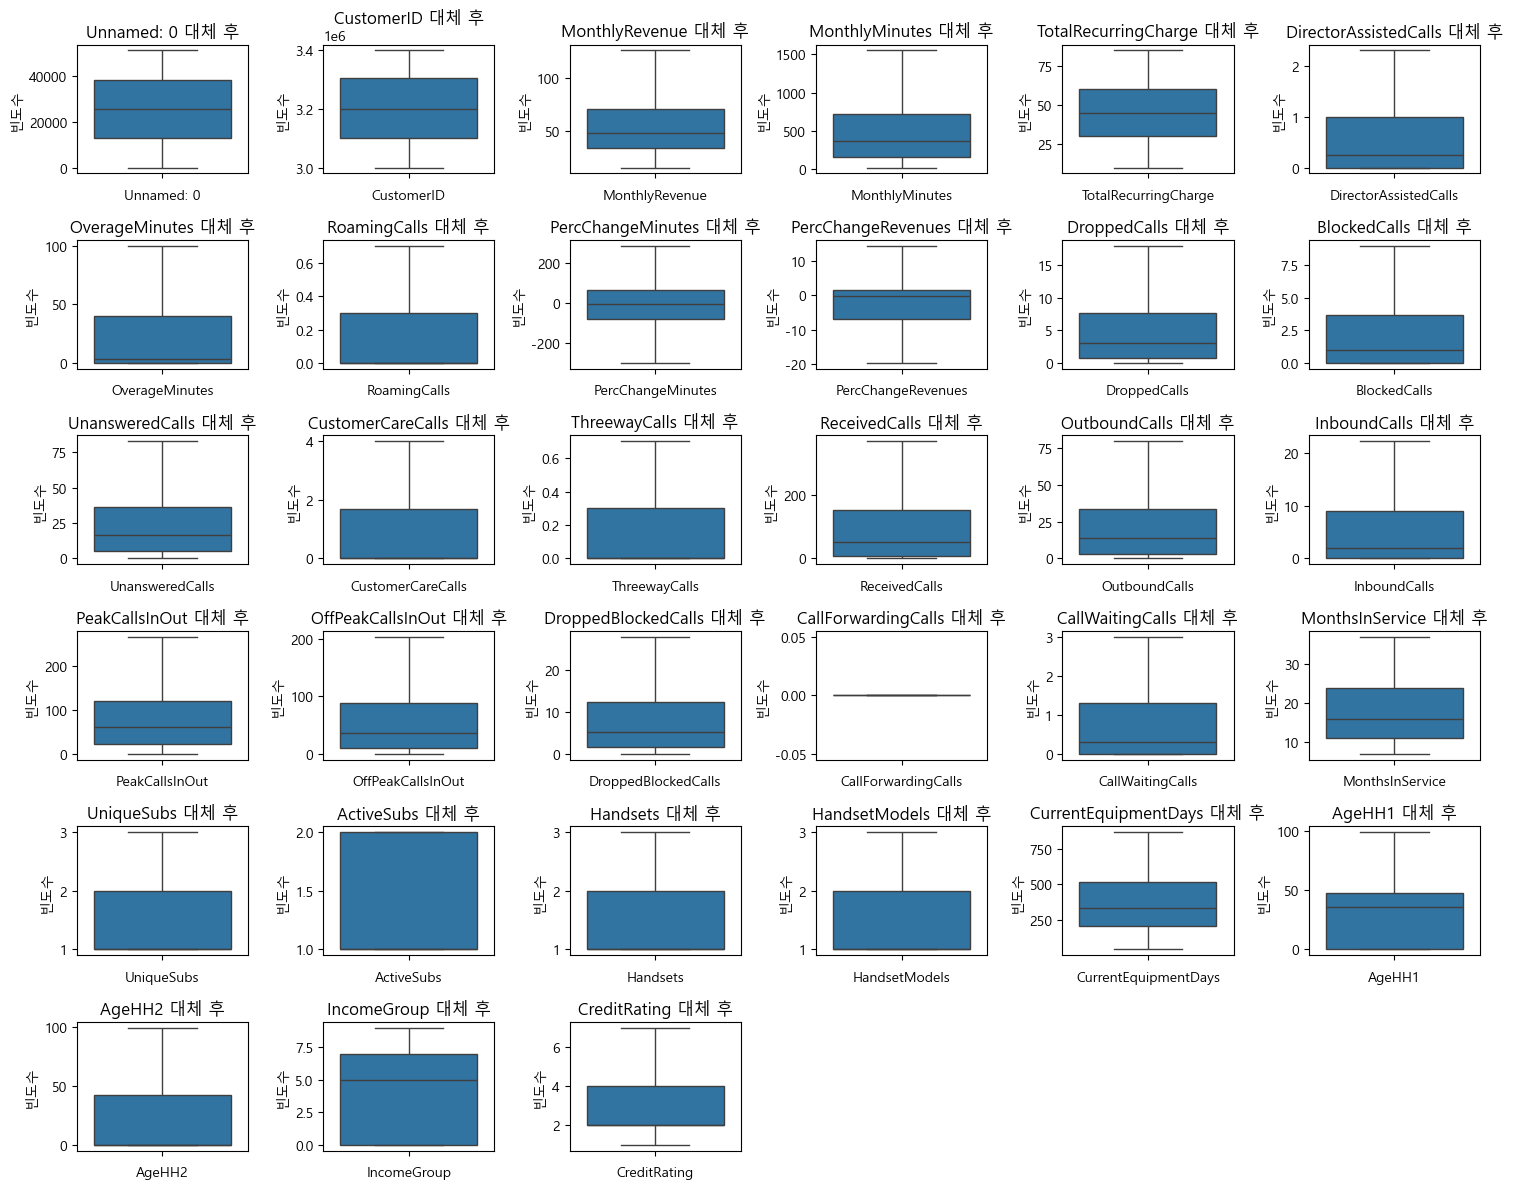

In [184]:
# 대체 후 시각화
plt.figure(figsize=(15, 12))
for i, column in enumerate(filtered_numeric_columns):
    plt.subplot(6, 6, i + 1) 
    sns.boxplot(df_replaced[column]) 
    plt.title(f'{column} 대체 후')
    plt.xlabel(column)
    plt.ylabel('빈도수')

plt.tight_layout()
plt.show()